In [18]:
# packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# packages for modek evaluation and classification models
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from tqdm import tqdm

# packages for saving the model
from pickle import dump, load

# script that has modeling functions in it
import modeling

In [2]:
# reads in the data 
df = pd.read_csv('creditcard.csv')

In [3]:
# looks at 10 random rows in the data
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126135,77943.0,-1.895630,2.261402,0.097307,-0.708852,0.367071,-0.103140,0.562780,0.189176,0.685210,...,-0.497839,-0.902894,-0.091001,-0.915946,0.347413,0.157523,0.962466,0.553191,7.16,0
70374,53842.0,-0.774304,0.474838,1.081765,0.244956,0.553250,-1.210144,0.823532,-0.204972,-0.321314,...,0.118812,0.390432,0.222695,0.375995,0.088613,-0.540104,-0.019961,0.034821,14.38,0
98800,66822.0,1.165907,-0.810112,0.517535,0.359200,-0.964412,0.385570,-0.834759,0.206140,-0.483048,...,-0.213116,-0.226400,-0.219571,-0.544798,0.539442,-0.192499,0.051703,0.026178,83.50,0
145308,86823.0,-0.004356,1.048543,-0.473675,-0.551370,0.876599,-0.803703,1.008385,-0.153914,0.021996,...,-0.324790,-0.842534,0.114217,0.558377,-0.425875,0.100977,0.087668,0.086733,17.88,0
191311,129203.0,1.952162,-0.803054,0.140147,0.907536,-1.708890,-1.057737,-0.942789,-0.051406,0.044103,...,-0.081425,0.245249,0.326461,0.827434,-0.385543,-0.614684,0.067995,-0.014744,34.00,0
169391,119676.0,0.026504,0.751439,0.163797,-0.769145,0.543600,-0.636805,0.845839,0.007657,-0.154895,...,-0.240132,-0.586352,0.025790,-0.365830,-0.505547,0.143482,0.237768,0.082083,2.58,0
158213,111092.0,2.102774,-0.059340,-1.464467,0.340277,0.239854,-0.761355,-0.062052,-0.249493,2.343160,...,0.073683,0.516901,0.013415,0.384170,0.302621,-0.469027,-0.035891,-0.060231,1.00,0
256676,157804.0,1.930140,-0.196311,-0.598804,1.249804,0.139400,0.717819,-0.412329,0.255383,0.918404,...,-0.502995,-1.202188,0.412910,0.137595,-0.279299,-1.125546,0.049843,-0.038708,4.99,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
77129,56899.0,-2.316531,-3.146354,1.372775,-1.220623,1.700094,-2.085858,-1.587104,0.432952,1.709063,...,0.180832,-0.212824,0.812619,0.173380,-0.494081,-0.985215,0.128408,0.228073,99.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# looks at the balance of Fraud and None Fraud
class_name ={0:'No Fraud',1:'Fraud'}
df['Class'].value_counts().rename(index=class_name)

No Fraud    284315
Fraud          492
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

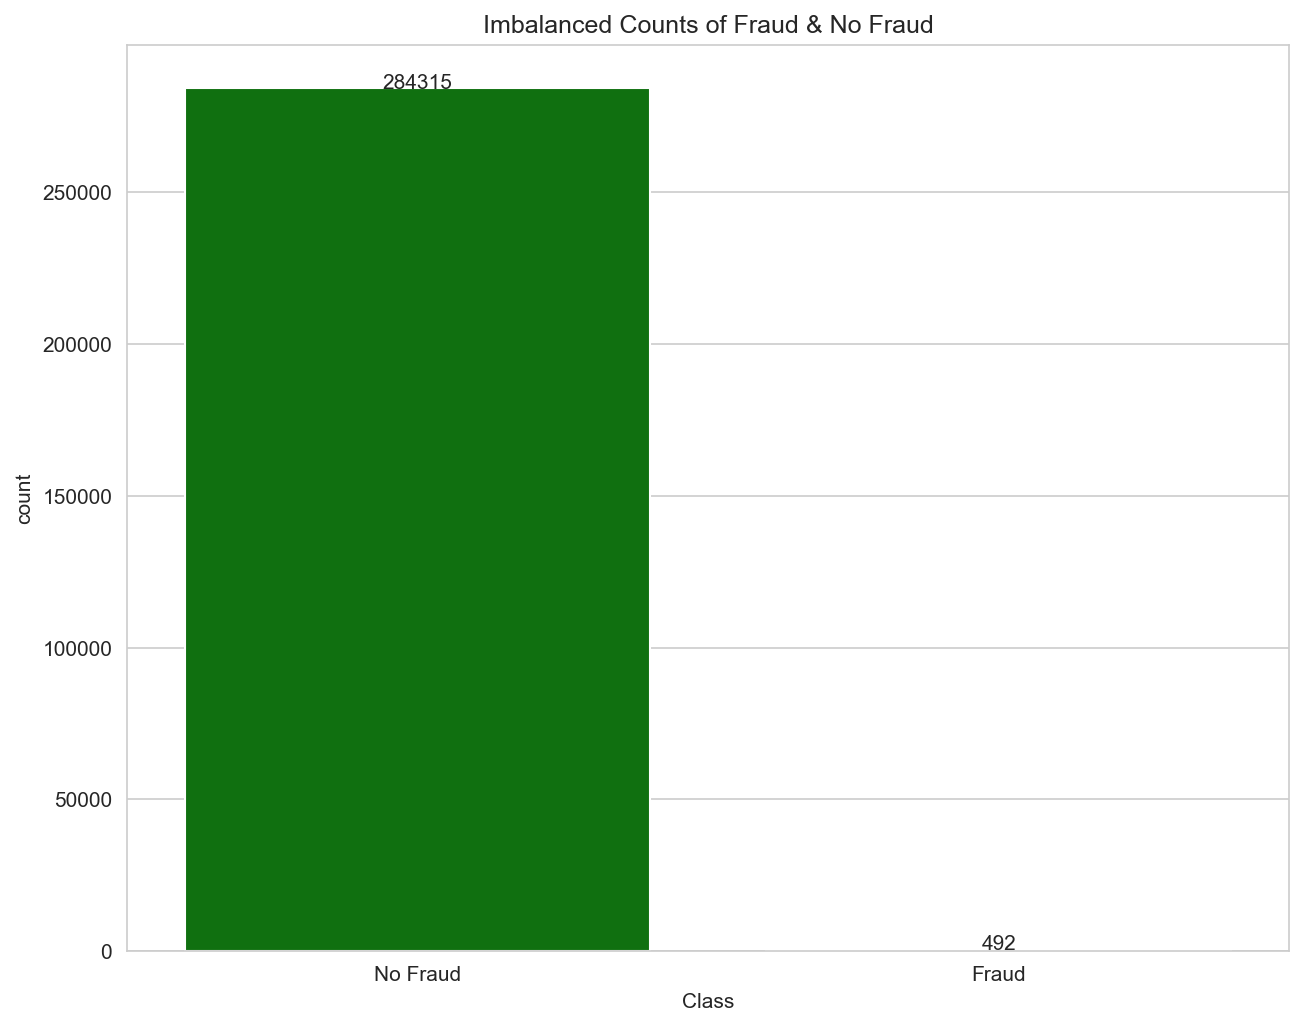

In [6]:
# visualizing the imbalance in the dataset
colors = ["g", "r"]
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

x = df['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
plt.figure(figsize=(10,8),dpi=150)
ax = sns.countplot(x,palette=colors,data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}".format(round(height,2)),ha='center')
plt.title('Imbalanced Counts of Fraud & No Fraud')
plt.savefig('Imbalanced_plot_of_data')
plt.show()

In [7]:
# splitting the data into train test split 
X = df.drop('Class',axis=1)
y = df['Class']
validation_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [8]:
# concatenate our training data back together
data = pd.concat([X_train,y_train],axis=1)

#separate minority and majority classes
no_fraud = data[data['Class']==0]
fraud = data[data['Class']== 1]

# unsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(no_fraud), # match number in majority class
                          random_state=42) 
# combines majority and unsampled minority
unsampled = pd.concat([no_fraud,fraud_upsampled])

# resplitting the data
y_train_new = unsampled['Class']
X_train_new = unsampled.drop('Class',axis=1)
y_train_new.value_counts().rename(index=class_name)

No Fraud    227453
Fraud       227453
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


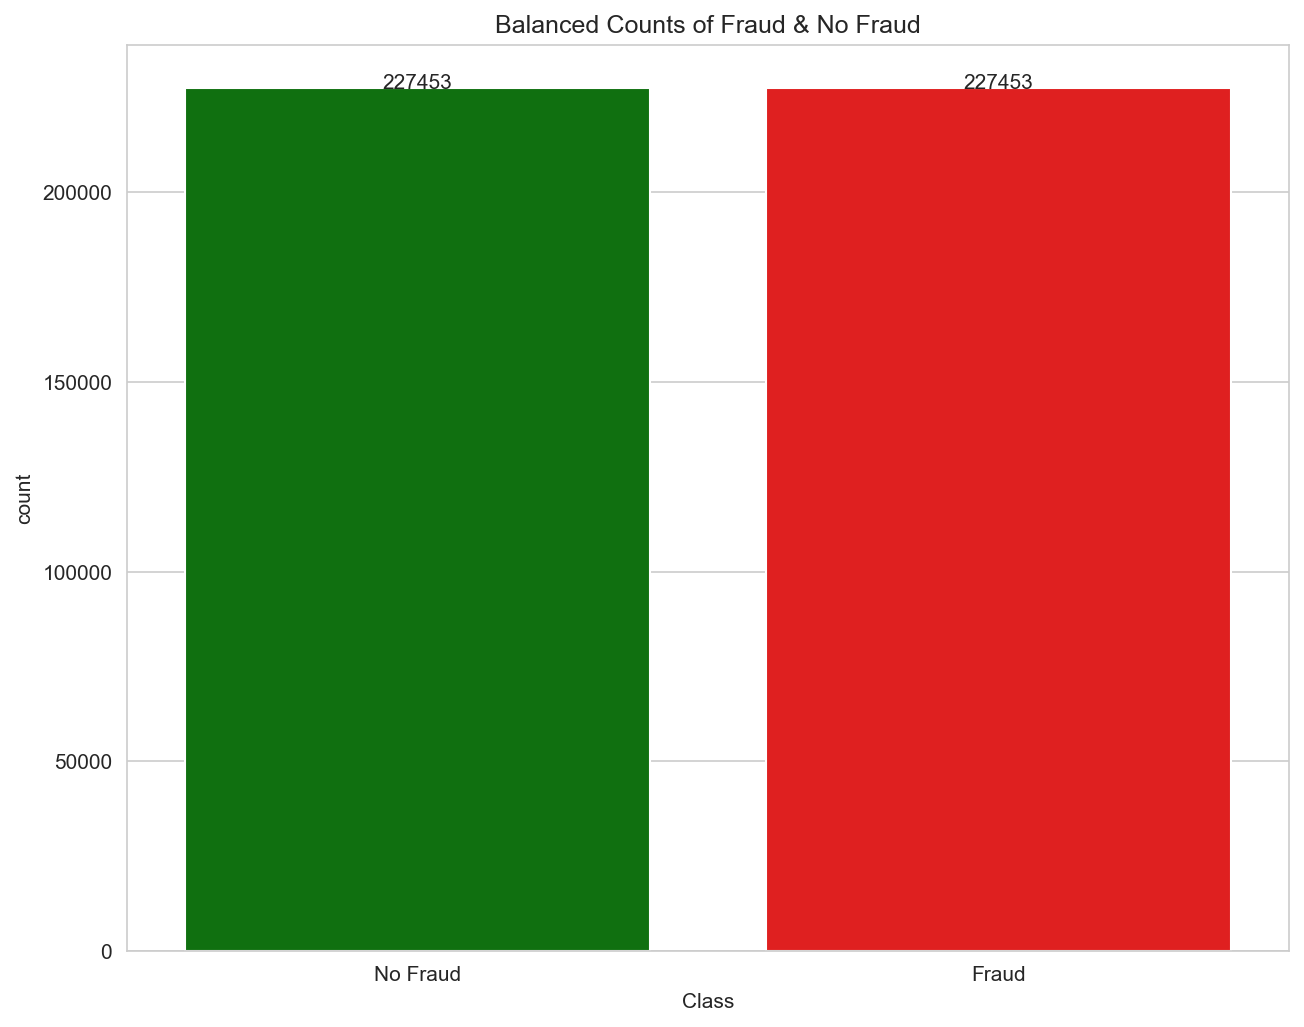

In [9]:

plt.figure(figsize=(10,8),dpi=150)
x = unsampled['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
ax = sns.countplot( x,data=unsampled,palette=colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}".format(round(height,2)),ha='center')
plt.title('Balanced Counts of Fraud & No Fraud')
plt.savefig('Balanced_plot_of_data')
plt.show()

In [10]:
# scaling the inputs of the dataset
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test = scaler.transform(X_test)

In [15]:
# models we will be testing out [(name,model)]
models = [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier()),
          ('SVC',SVC()),
          ('XGB',XGBClassifier()),
          ('DTC',DecisionTreeClassifier()),
          ('ADA',AdaBoostClassifier()),
          ('RF', RandomForestClassifier()),
          ('ET',ExtraTreesClassifier())]

 12%|█████▋                                       | 1/8 [00:24<02:54, 24.97s/it]

Model LR has an average accuracy score of: 0.9504974664049332


 25%|██████████▎                              | 2/8 [54:48<3:13:01, 1930.17s/it]

Model KNN has an average accuracy score of: 0.9996416840324456


 38%|█████████████▉                       | 3/8 [6:44:15<14:45:13, 10622.69s/it]

Model SVC has an average accuracy score of: 0.9956716332169234


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:38:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:39:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|███████████████████▌                   | 4/8 [6:47:53<7:14:20, 6515.06s/it]

Model XGB has an average accuracy score of: 0.999912069770437


 62%|████████████████████████▍              | 5/8 [6:48:42<3:29:10, 4183.36s/it]

Model DTC has an average accuracy score of: 0.9997208212897913


 75%|█████████████████████████████▎         | 6/8 [6:55:04<1:36:21, 2890.91s/it]

Model ADA has an average accuracy score of: 0.9713567126974588


 88%|██████████████████████████████████▏    | 7/8 [8:48:31<1:09:31, 4171.18s/it]

Model RF has an average accuracy score of: 0.9999472418042747


100%|█████████████████████████████████████████| 8/8 [8:51:27<00:00, 3985.88s/it]

Model ET has an average accuracy score of: 0.9999648278695166


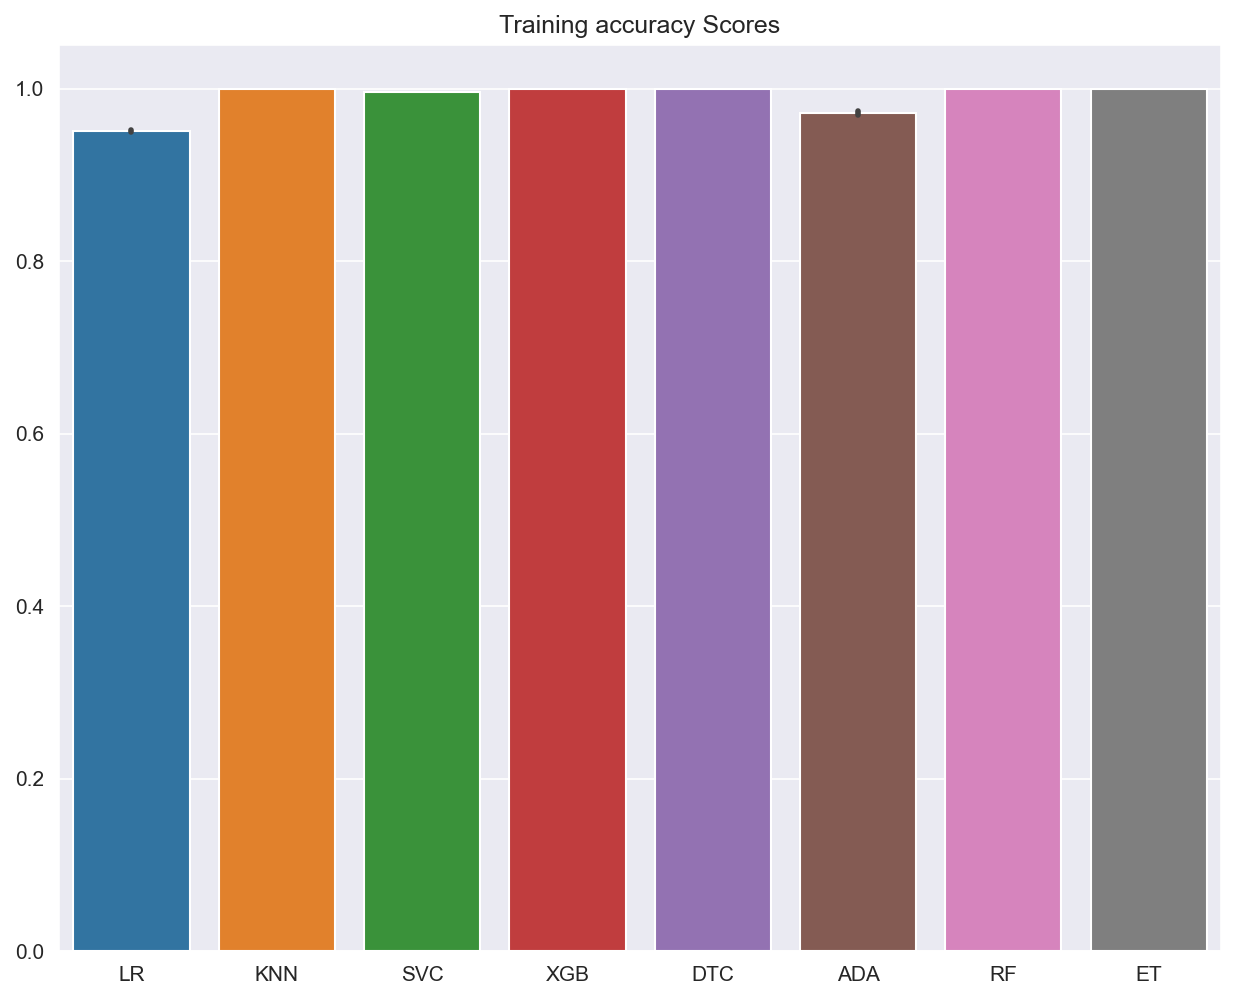

 12%|█████▋                                       | 1/8 [00:24<02:49, 24.25s/it]

Model LR has an average recall score of: 0.9231694032862924


 25%|██████████▎                              | 2/8 [53:11<3:07:19, 1873.24s/it]

Model KNN has an average recall score of: 1.0


 38%|██████████████▋                        | 3/8 [2:57:43<6:09:07, 4429.50s/it]

Model SVC has an average recall score of: 0.9976040068508203


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|███████████████████▌                   | 4/8 [3:01:50<3:05:14, 2778.57s/it]

Model XGB has an average recall score of: 1.0


 62%|████████████████████████▍              | 5/8 [3:02:47<1:29:50, 1796.85s/it]

Model DTC has an average recall score of: 1.0


 75%|██████████████████████████████▊          | 6/8 [3:09:07<43:50, 1315.32s/it]

Model ADA has an average recall score of: 0.9592947034564716


 88%|███████████████████████████████████▉     | 7/8 [3:20:20<18:25, 1105.14s/it]

Model RF has an average recall score of: 1.0


100%|█████████████████████████████████████████| 8/8 [3:23:37<00:00, 1527.13s/it]

Model ET has an average recall score of: 1.0


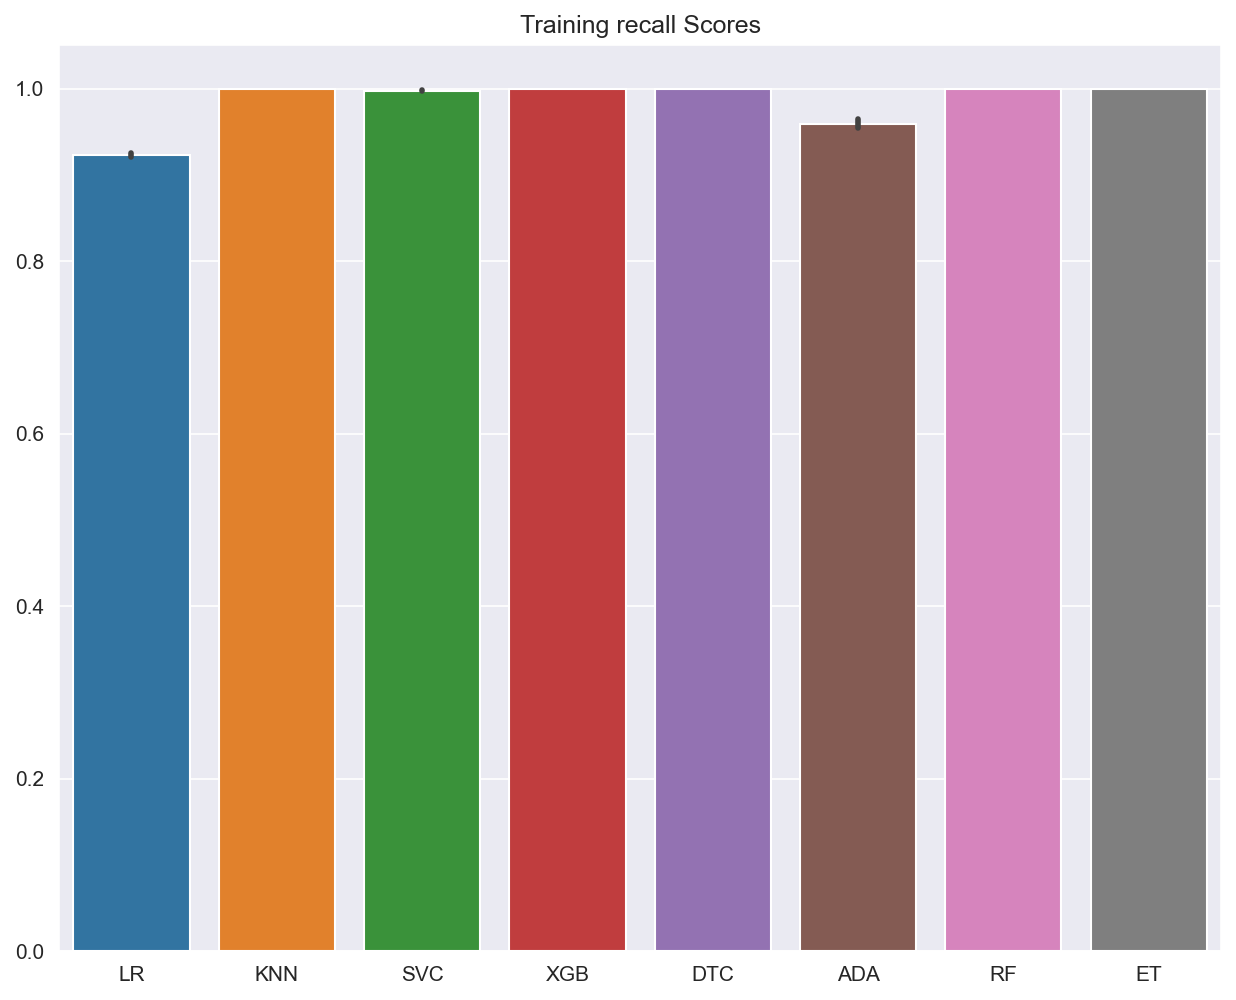

In [16]:
# testing 2 scoring metric on all the models above (running this will take a while)
scoring = ['accuracy','recall']
for score in scoring:  
    modeling.show_model_scores(models=models,x=X_train_new,y=y_train_new,scoring=score)

In [17]:
#show_model_scores(X_train_new,y_train_new)

# Random Forest Classifier Tuning 

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# using a random searchCV and setting our scoring and # of CV 
scoring = 'recall'
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)

rs = RandomizedSearchCV(estimator=RandomForestClassifier(),
                       param_distributions=random_grid,
                       cv= kfold,
                       n_iter=120,
                       verbose=3,
                       n_jobs= -1,
                        scoring=scoring)
# fitting the random search model to our training dataset
rs.fit(X_train_new,y_train_new)
print(f'Best Recall score of {gs.best_score_} using these params {gs.best_params_}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


# ExtraTrees Classifier Tuning 

In [13]:
param_tuning={
    'n_estimators' : [10, 50, 100, 500, 1000, 5000],
    'max_features' : [1,5,9,13,16,21],
    'min_samples_split': [2,5,8,10,12,15],
}
# using grid search to find the best parameters
scoring = 'accuracy'
kflod = KFold(n_splits=5,random_state=seed,shuffle=True)

gs = GridSearchCV (estimator = ExtraTreesClassifier(),
                       param_grid = param_tuning,
                       cv = kflod,
                       n_jobs= -1,
                       verbose = 7,scoring=scoring)
# fitting the grid search model to our training dataset
gs.fit(X_train,y_train)
print(f'Best accuracy score of {gs.best_score_} using these params {gs.best_params_}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 3/5] END max_features=1, min_samples_split=2, n_estimators=50;, score=1.000 total time=   8.5s
[CV 1/5] END max_features=1, min_samples_split=2, n_estimators=500;, score=0.999 total time= 1.5min
[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=1000;, score=0.999 total time= 2.9min
[CV 3/5] END max_features=1, min_samples_split=5, n_estimators=100;, score=0.999 total time=  17.4s
[CV 1/5] END max_features=1, min_samples_split=5, n_estimators=500;, score=0.999 total time= 1.4min
[CV 4/5] END max_features=1, min_samples_split=5, n_estimators=500;, score=0.999 total time= 1.4min
[CV 2/5] END max_features=1, min_samples_split=5, n_estimators=1000;, score=0.999 total time= 2.9min
[CV 5/5] END max_features=1, min_samples_split=5, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 3/5] END max_features=1, min_samples_split=5, n_estimators=5000;, score=1.000 total time=14.2min
[CV 1/5] END max_features=1, min_

[CV 1/5] END max_features=9, min_samples_split=15, n_estimators=10;, score=0.999 total time=   4.1s[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=50;, score=0.999 total time=   8.5s
[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=  18.8s
[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=1000;, score=0.999 total time= 3.0min
[CV 5/5] END max_features=1, min_samples_split=2, n_estimators=5000;, score=0.999 total time=14.0min
[CV 2/5] END max_features=1, min_samples_split=8, n_estimators=100;, score=0.999 total time=  17.4s
[CV 5/5] END max_features=1, min_samples_split=8, n_estimators=100;, score=0.999 total time=  16.9s
[CV 3/5] END max_features=1, min_samples_split=8, n_estimators=500;, score=1.000 total time= 1.4min
[CV 1/5] END max_features=1, min_samples_split=8, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 4/5] END max_features=1, min_samples_split=8, n_estimators=1000;, score=0.999 total time= 2.9mi


[CV 2/5] END max_features=9, min_samples_split=15, n_estimators=10;, score=1.000 total time=   4.3s
[CV 3/5] END max_features=9, min_samples_split=15, n_estimators=10;, score=1.000 total time=   4.4s
[CV 4/5] END max_features=9, min_samples_split=15, n_estimators=10;, score=0.999 total time=   4.2s
[CV 5/5] END max_features=9, min_samples_split=15, n_estimators=10;, score=1.000 total time=   4.3s
[CV 1/5] END max_features=9, min_samples_split=15, n_estimators=50;, score=0.999 total time=  20.4s
[CV 2/5] END max_features=9, min_samples_split=15, n_estimators=50;, score=1.000 total time=  20.5s
[CV 3/5] END max_features=9, min_samples_split=15, n_estimators=50;, score=1.000 total time=  20.5s
[CV 5/5] END max_features=9, min_samples_split=15, n_estimators=50;, score=0.999 total time=  20.4s
[CV 2/5] END max_features=9, min_samples_split=15, n_estimators=100;, score=1.000 total time=  45.0s
[CV 1/5] END max_features=9, min_samples_split=15, n_estimators=500;, score=0.999 total time= 3.6m

[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   1.9s
[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=  18.2s
[CV 5/5] END max_features=1, min_samples_split=2, n_estimators=500;, score=0.999 total time= 1.5min
[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=5000;, score=0.999 total time=14.4min
[CV 5/5] END max_features=1, min_samples_split=5, n_estimators=5000;, score=0.999 total time=13.9min
[CV 2/5] END max_features=1, min_samples_split=10, n_estimators=500;, score=0.999 total time= 1.4min
[CV 5/5] END max_features=1, min_samples_split=10, n_estimators=500;, score=0.999 total time= 1.4min
[CV 3/5] END max_features=1, min_samples_split=10, n_estimators=1000;, score=0.999 total time= 2.9min
[CV 1/5] END max_features=1, min_samples_split=10, n_estimators=5000;, score=0.999 total time=13.3min
[CV 4/5] END max_features=1, min_samples_split=12, n_estimators=5000;, score=0.999 total time

[CV 5/5] END max_features=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   1.9s
[CV 3/5] END max_features=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=  18.3s
[CV 1/5] END max_features=1, min_samples_split=2, n_estimators=1000;, score=0.999 total time= 3.0min
[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=5000;, score=0.999 total time=14.2min
[CV 4/5] END max_features=1, min_samples_split=8, n_estimators=100;, score=0.999 total time=  17.4s
[CV 2/5] END max_features=1, min_samples_split=8, n_estimators=500;, score=0.999 total time= 1.4min
[CV 5/5] END max_features=1, min_samples_split=8, n_estimators=500;, score=0.999 total time= 1.4min
[CV 3/5] END max_features=1, min_samples_split=8, n_estimators=1000;, score=0.999 total time= 2.9min
[CV 1/5] END max_features=1, min_samples_split=8, n_estimators=5000;, score=0.999 total time=14.0min
[CV 3/5] END max_features=1, min_samples_split=10, n_estimators=5000;, score=0.999 total time=13.

[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   1.8s
[CV 5/5] END max_features=1, min_samples_split=2, n_estimators=50;, score=0.999 total time=   8.2s
[CV 2/5] END max_features=1, min_samples_split=2, n_estimators=500;, score=0.999 total time= 1.5min
[CV 5/5] END max_features=1, min_samples_split=2, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 2/5] END max_features=1, min_samples_split=5, n_estimators=100;, score=0.999 total time=  17.3s
[CV 5/5] END max_features=1, min_samples_split=5, n_estimators=100;, score=0.999 total time=  17.0s
[CV 3/5] END max_features=1, min_samples_split=5, n_estimators=500;, score=0.999 total time= 1.4min
[CV 1/5] END max_features=1, min_samples_split=5, n_estimators=1000;, score=0.999 total time= 2.9min
[CV 4/5] END max_features=1, min_samples_split=5, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 2/5] END max_features=1, min_samples_split=5, n_estimators=5000;, score=0.999 total time=14.2mi

[CV 1/5] END max_features=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   1.8s
[CV 1/5] END max_features=1, min_samples_split=2, n_estimators=100;, score=0.999 total time=  17.8s
[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=500;, score=0.999 total time= 1.5min
[CV 3/5] END max_features=1, min_samples_split=2, n_estimators=5000;, score=1.000 total time=14.5min
[CV 1/5] END max_features=1, min_samples_split=8, n_estimators=10;, score=0.999 total time=   2.0s
[CV 2/5] END max_features=1, min_samples_split=8, n_estimators=10;, score=0.999 total time=   1.8s
[CV 3/5] END max_features=1, min_samples_split=8, n_estimators=10;, score=1.000 total time=   1.9s
[CV 4/5] END max_features=1, min_samples_split=8, n_estimators=10;, score=0.999 total time=   1.8s
[CV 5/5] END max_features=1, min_samples_split=8, n_estimators=10;, score=0.999 total time=   1.7s
[CV 1/5] END max_features=1, min_samples_split=8, n_estimators=50;, score=0.999 total time=   8.1s
[CV 2/

[CV 3/5] END max_features=1, min_samples_split=2, n_estimators=10;, score=0.999 total time=   1.7s
[CV 4/5] END max_features=1, min_samples_split=2, n_estimators=50;, score=0.999 total time=   8.4s
[CV 3/5] END max_features=1, min_samples_split=2, n_estimators=500;, score=1.000 total time= 1.6min
[CV 1/5] END max_features=1, min_samples_split=2, n_estimators=5000;, score=0.999 total time=14.3min
[CV 4/5] END max_features=1, min_samples_split=5, n_estimators=5000;, score=0.999 total time=14.1min
[CV 3/5] END max_features=1, min_samples_split=10, n_estimators=500;, score=0.999 total time= 1.4min
[CV 1/5] END max_features=1, min_samples_split=10, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 4/5] END max_features=1, min_samples_split=10, n_estimators=1000;, score=0.999 total time= 2.8min
[CV 2/5] END max_features=1, min_samples_split=10, n_estimators=5000;, score=0.999 total time=13.3min
[CV 5/5] END max_features=1, min_samples_split=12, n_estimators=5000;, score=0.999 total time

Best accuracy score of 0.9995742719831465 using these params {'max_features': 21, 'min_samples_split': 5, 'n_estimators': 500}


# Evaluating the Model

In [15]:
selected_model = ExtraTreesClassifier(n_estimators=500,max_features=21,min_samples_split=5)

In [27]:
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. classification model eg: LogisticRegression(),KNeighborsClassifier() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name= type(model).__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training Mean Accuracy score: {train_score}\nTesting Mean Accuracy score: {test_score}")
    
    
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    #df_test=pd.DataFrame({"Actual": y_test,"Predicted":y_pred})
    
    #plot confusion Matrix
    plt.figure(figsize=(10,8),dpi=150)
    plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues,
                                   display_labels=['No_Fraud=0','Fraud=1'])
    plt.title(f'Confusion Matrix for {model_name} Model')
    plt.show()
    print(classification_report(y_test,y_pred))

Training Mean Accuracy score: 1.0
Testing Mean Accuracy score: 0.9996137776061234
Prediction completed.


<Figure size 1500x1200 with 0 Axes>

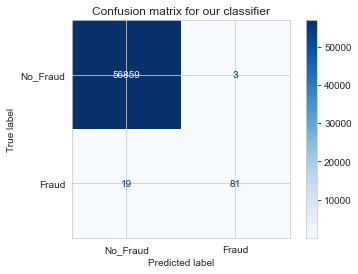

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.96      0.81      0.88       100

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
evaluate_model(selected_model,X_train_new,y_train_new,X_test,y_test)

Hi I am John
Hi I am larry
Hi I am Jordan
